# 

# Lasso problem


The lasso problem is:

$$ L_{n,\delta} :=\min_{\beta} \frac{1}{2n}|| y - X \beta ||^2_2 $$
$$ \text{S.t} ||\beta||_1 \leq \delta$$

or:

$$ L_{n,\delta} :=\min_{\beta} \frac{1}{2n}|| y - X \beta ||^2_2 + \alpha ||\beta||_1 $$

The objective of this notebook is , Compare Lasso, R-FS and Path R-FS profile coeficients and solutions.

## Toy Datasets

We start with a toy dataset. And a value of $\delta = 1$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, LinearRegression

n, p = 50 ,10 #number of samples and features
rho = 0.5
sigma= 1.0

#generate covariance matrix
Sigma = rho ** np.abs(np.subtract.outer(np.arange(p), np.arange(p)))
X = np.random.multivariate_normal(mean=np.zeros(p), cov=Sigma, size=n)

#standardize X
X -= X.mean(axis=0)
X /= np.linalg.norm(X, axis=0)


beta_true = np.array([2.0, -1.5, 5.0, 1.0, 1.0, 2.0, 7.0, 8.0, 1.0, -1.0])
y = X @ beta_true + sigma * np.random.randn(n)

data = pd.DataFrame(X, columns =[f"X{i+1}" for i in range(p)])
data["y"] = y

verify correlations betewn variables

In [2]:
data.corr().round(2)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
X1,1.00,0.60,0.29,0.04,0.22,-0.07,0.15,0.13,0.09,0.00,0.26
X2,0.60,1.00,0.58,0.25,0.31,0.02,0.00,-0.19,-0.10,-0.13,0.15
X3,0.29,0.58,1.00,0.47,0.36,0.20,0.14,-0.18,-0.05,-0.25,0.37
X4,0.04,0.25,0.47,1.00,0.54,0.12,0.06,-0.19,-0.27,-0.40,0.23
X5,0.22,0.31,0.36,0.54,1.00,0.51,0.24,-0.06,-0.16,-0.32,0.46
X6,-0.07,0.02,0.20,0.12,0.51,1.00,0.41,-0.15,-0.11,-0.06,0.36
X7,0.15,0.00,0.14,0.06,0.24,0.41,1.00,0.51,0.45,0.24,0.77
X8,0.13,-0.19,-0.18,-0.19,-0.06,-0.15,0.51,1.00,0.68,0.40,0.60
X9,0.09,-0.10,-0.05,-0.27,-0.16,-0.11,0.45,0.68,1.00,0.54,0.44
X10,0.00,-0.13,-0.25,-0.40,-0.32,-0.06,0.24,0.40,0.54,1.00,0.04


### Laso path

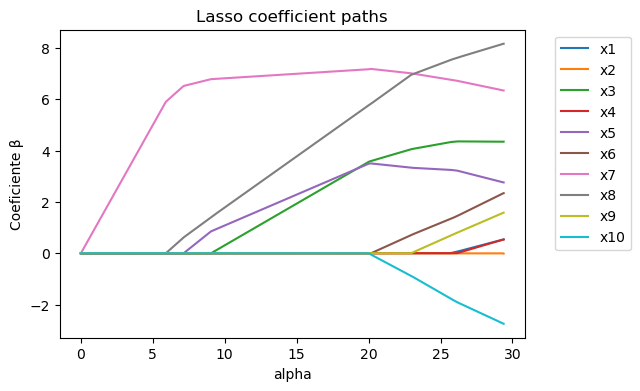

In [3]:
alphas, coefs, _ = lasso_path(X, y, n_alphas=1000)
from sklearn.linear_model import Lasso

plt.figure(figsize=(6,4))
bnorms = [np.linalg.norm(coefs[:, i], 1) for i in range(coefs.shape[1])]

for i in range(p):
    plt.plot(bnorms, coefs[i, :], label=f"x{i+1}")
plt.xlabel("alpha")
plt.ylabel("Coeficiente β")
plt.title("Lasso coefficient paths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### R_FS 

In [4]:
from boosting import Boosting 
exp = Boosting(X,y)


deltas = [1/alpha for alpha in alphas]

In [5]:
solutions = []
exp = Boosting(X,y)
for delta in deltas:
    solutions.append(exp.R_FS(delta=delta, numiter=10000))

### Path R-FS

In [6]:
solutions1 = []

numiter=10000
deltalist = list(np.linspace(1, 10000, numiter+1))


for delta in deltas:
    solutions1.append(exp.Path_R_FS(numiter= numiter,
                                    epsilon=min(deltalist)/2,
                                    delta_list= deltalist))

### Comparation

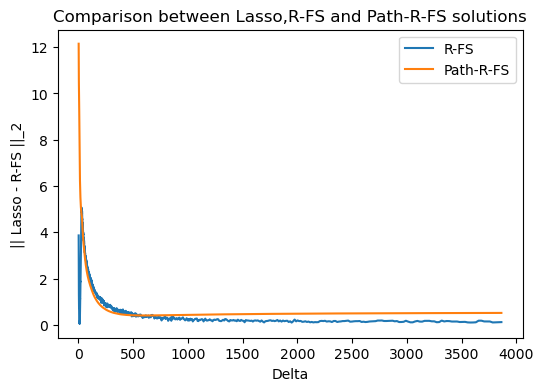

In [7]:
comp1 = [np.linalg.norm(coefs[:, i] - solutions1[i], 2) for i in range(len(solutions1))]
comp = [np.linalg.norm(coefs[:, i] - solutions[i], 2) for i in range(len(solutions))]

plt.figure(figsize=(6,4))
plt.plot(deltas, comp)
plt.plot(deltas, comp1)
plt.xlabel("Delta")
plt.ylabel("|| Lasso - R-FS ||_2")
plt.title("Comparison between Lasso,R-FS and Path-R-FS solutions")
plt.legend(["R-FS", "Path-R-FS"], loc='upper right')
plt.show()

# Prostate dataset

In [8]:
url = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data"
df = pd.read_csv(url, sep="\t")
X = df.drop(columns=["lpsa", "train","Unnamed: 0"]).values
y = df["lpsa"].values

In [9]:
def normalize_data(data,responses):
    y = responses - np.mean(responses)
    X = data - np.mean(data, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X, y

X, y = normalize_data(X, y)

## Lasso

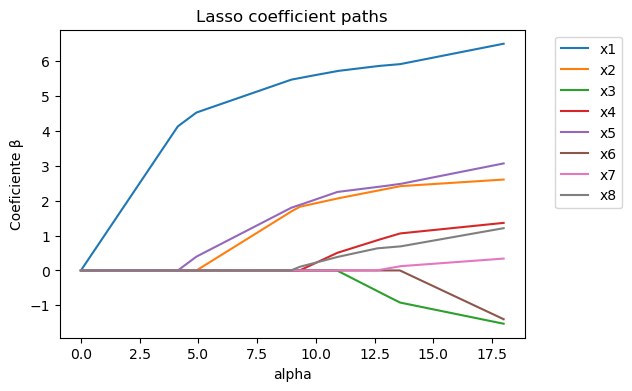

In [10]:
alphas, coefs, _ = lasso_path(X, y, n_alphas=1000)
from sklearn.linear_model import Lasso

plt.figure(figsize=(6,4))
bnorms = [np.linalg.norm(coefs[:, i], 1) for i in range(coefs.shape[1])]

for i in range(coefs.shape[0]):
    plt.plot(bnorms, coefs[i, :], label=f"x{i+1}")
plt.xlabel("alpha")
plt.ylabel("Coeficiente β")
plt.title("Lasso coefficient paths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### R-FS

In [11]:
deltas = [1/alpha for alpha in alphas]

In [12]:
solutions = []
exp = Boosting(X,y)
for delta in deltas:
    solutions.append(exp.R_FS(delta=delta, numiter=10000))

### Path-R-FS

In [13]:
solutions1 = []

numiter=10000
deltalist = list(np.linspace(1, 10000, numiter+1))


for delta in deltas:
    solutions1.append(exp.Path_R_FS(numiter= numiter,
                                    epsilon=min(deltalist)/2,
                                    delta_list= deltalist))

### Comparation

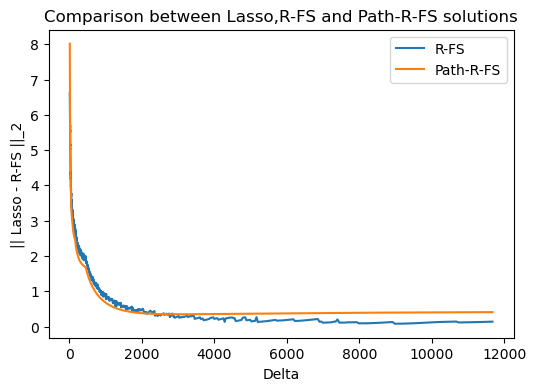

In [14]:
comp1 = [np.linalg.norm(coefs[:, i] - solutions1[i], 2) for i in range(len(solutions1))]
comp = [np.linalg.norm(coefs[:, i] - solutions[i], 2) for i in range(len(solutions))]

plt.figure(figsize=(6,4))
plt.plot(deltas, comp)
plt.plot(deltas, comp1)
plt.xlabel("Delta")
plt.ylabel("|| Lasso - R-FS ||_2")
plt.title("Comparison between Lasso,R-FS and Path-R-FS solutions")
plt.legend(["R-FS", "Path-R-FS"], loc='upper right')
plt.show()